# Example 1

In [1]:
#importing necessary packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define a function which will calculate the important values
def coef_estimation(x, y):
    #give number of observations n
    n = np.size(x)
    #calculate mean of x and y
    m_x, m_y = np.mean(x), np.mean(y)
    
    #find cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    
    #calculate regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return(b_0, b_1)

In [3]:
#define a function which will plot the regression line
def plot_regression_line(x, y, b):
    #plot the actual points as scatter plot
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    
    #predict response vector
    y_pred = b[0] + b[1]*x
    
    #plot the regression line
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

Estimated coefficients:
b_0 = 154.5454545454545 
b_1 = 117.87878787878788


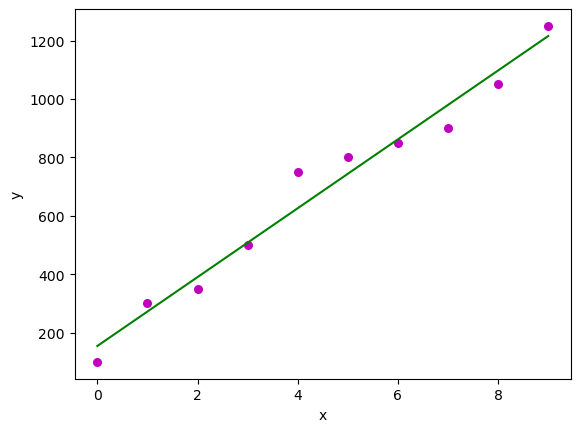

In [5]:
#define main() function for providing dataset and calling the function
def main():
   x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
   y = np.array([100, 300, 350, 500, 750, 800, 850, 900, 1050, 1250])
   b = coef_estimation(x, y)
   print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))
   plot_regression_line(x, y, b)
   
if __name__ == "__main__":
    main()

# Example 2

In [6]:
#importing necessary packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [941.43097333]
Mean squared error: 3035.06
Variance score: 0.41


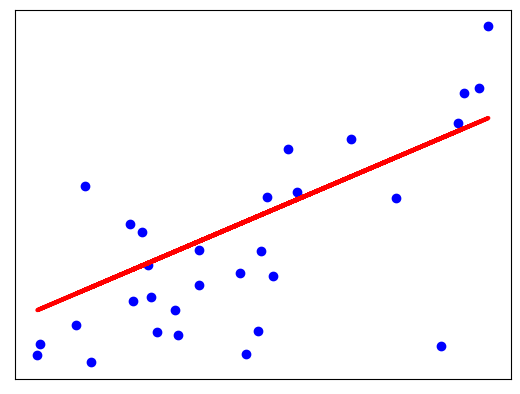

In [9]:
#load the diabetes dataset
diabetes = datasets.load_diabetes()

#using one feature
X = diabetes.data[:, np.newaxis, 2]

#split the data into training and testing sets
X_train = X[:-30]
X_test = X[-30:]

#split the target into training and testing sets
y_train = diabetes.target[:-30]
y_test = diabetes.target[-30:]

#create linear regression object 
regr = linear_model.LinearRegression()

#train the model using the training sets
regr.fit(X_train, y_train)

#make predictions using the testing set
y_pred = regr.predict(X_test)

#print some coefficient
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

#plot the outputs
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()